# Modeling

___

### 1. Import Libraries

In [79]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler

___

### 2. Expand maximum range of rows

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

___

### 3. Load Data

In [3]:
paleo = pd.read_csv('../Data/scaled_paleo.csv', index_col=0)
primal = pd.read_csv('../Data/scaled_primal.csv', index_col=0) 
vegan = pd.read_csv('../Data/scaled_vegan.csv', index_col=0) 
vegetarian = pd.read_csv('../Data/scaled_vegetarian.csv', index_col=0) 
whole30 = pd.read_csv('../Data/scaled_whole30.csv', index_col=0)

___

### 4. Train / Test Split Data

For train/test splits, as your dataset gets bigger and bigger, the split can lean more and more towards the "train" set. As your dataset gets really small (100 observations) then the split should be closer to 50/50 for train/test.

In [4]:
x_variables_1 = ['num_ingredients', 
              'pricePerServing', 
              'readyInMinutes', 
              'servings', 
              'weightWatcherSmartPoints', 
              'Calories', 
              'Fat', 
              'Saturated_Fat', 
              'Carbohydrates', 
              'Sugar', 
              'Cholesterol', 
              'Sodium', 
              'Protein', 
              'Vitamin_K', 
              'Vitamin_A', 
              'Vitamin_C', 
              'Manganese', 
              'Folate', 
              'Fiber', 
              'Copper', 
              'Magnesium', 
              'Phosphorus', 
              'Vitamin_B6', 
              'Potassium', 
              'Vitamin_B1', 
              'Iron', 
              'Vitamin_B2', 
              'Vitamin_E', 
              'Zinc', 
              'Vitamin_B5', 
              'Vitamin_B3', 
              'Calcium', 
              'Selenium', 
              'num_words_instructions', 
              'num_steps_instructions']

In [5]:
predictors = vegetarian[x_variables_1]

In [6]:
target = vegetarian['aggregateLikes']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, random_state = 2020, test_size = .25) 

___

### 5. Run Regression 1, Fit, & Cull Non-Significant Predictors

#### Regression 1 - fit to model, check for p-values less than 0.3

In [8]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
lr = sm.OLS(y, x, hasconst= True) #assign to the x and y variables with constant to the sm.OLS() function
results = lr.fit() #assign the result of the OLS to fit the data
results.summary() #show the summary

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.598
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           3.93e-06
Time:                        14:47:22   Log-Likelihood:                -5403.8
No. Observations:                 471   AIC:                         1.088e+04
Df Residuals:                     435   BIC:                         1.103e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1899.4616   4404.677      0.431      0.667   -6757.634    1.06e+04
num_ingredients           1240.9808   1488.430      0.834      0.405   -1684.429    4166.390
pricePerServing          -2534.0664   2664.038     -0.951      0.342   -7770.053    2701.920
readyInMinutes            2434.6581   1432.080      1.700      0.090    -379.999    5249.315
servings                 -2173.0608   1421.548     -1.529      0.127   -4967.017     620.896
weightWatcherSmartPoints  -853.5684   6456.150     -0.132      0.895   -1.35e+04    1.18e+04
Calories                  1.133e+04   3.44e+04      0.330      0.742   -5.62e+04    7.89e+04
Fat                      -6450.2818   1.98e+04     -0.326      0.744   -4.53e+04    3.24e+04
Saturated_Fat              661.8762   2363.526      0.280      0.780   -3983.475    5307.228
Carbohydrates            -4329.5485   1.69e+04     -0.256      0.798   -3.75e+04    2.89e+04
Sugar                     -808.5016   1992.874     -0.406      0.685   -4725.362    3108.358
Cholesterol              -1.647e+04   1.12e+04     -1.475      0.141   -3.84e+04    5481.580
Sodium                    6606.1902   1321.048      5.001      0.000    4009.759    9202.622
Protein                  -1.659e+04   1.15e+04     -1.440      0.151   -3.92e+04    6049.687
Vitamin_K                -2258.5241   1681.420     -1.343      0.180   -5563.242    1046.194
Vitamin_A                 -887.1487   1269.095     -0.699      0.485   -3381.469    1607.172
Vitamin_C                  -69.1657   1714.269     -0.040      0.968   -3438.446    3300.115
Manganese                 1060.3634   2013.020      0.527      0.599   -2896.091    5016.817
Folate                     -89.9394   2248.162     -0.040      0.968   -4508.549    4328.671
Fiber                    -5614.5450   2960.986     -1.896      0.059   -1.14e+04     205.073
Copper                    -997.3799   1288.200     -0.774      0.439   -3529.250    1534.490
Magnesium                -2797.4663   3189.384     -0.877      0.381   -9065.985    3471.053
Phosphorus                7818.6493   4769.958      1.639      0.102   -1556.382    1.72e+04
Vitamin_B6               -4132.3764   3186.117     -1.297      0.195   -1.04e+04    2129.721
Potassium                  188.3991   2890.608      0.065      0.948   -5492.895    5869.693
Vitamin_B1               -2817.3884   3714.115     -0.759      0.449   -1.01e+04    4482.453
Iron                      -220.5380   2041.372     -0.108      0.914   -4232.716    3791.640
Vitamin_B2                  1.2e+04   3838.364      3.126      0.002    4455.343    1.95e+04
Vitamin_E                -1135.7953   2097.471     -0.542      0.588   -5258.232    2986.641
Zinc                      4802.7104   5091.051      0.943      0.346   -5203.406    1.48e+04
Vitamin_B5    

#### Notes 
It looks like many variables are non-significant predictors for "likes" so we will use a fairly high alpha cutoff (0.3) in our round 1 culling of predictors.

#### Regression 2  - provide updated list of predictors (p < 0.3) and fit to model again, check for p-values less than 0.05

In [9]:
x_train = x_train[[
    'num_ingredients',  
    'readyInMinutes', 
    'servings', 
    'Sodium',
    'Vitamin_K', 
    'Fiber', 
    'Phosphorus', 
    'Vitamin_B1', 
    'Vitamin_B2', 
    'Vitamin_B5', 
    'num_steps_instructions']]

In [10]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
lr = sm.OLS(y, x, hasconst= True) #assign to the x and y variables with constant to the sm.OLS() function
results = lr.fit() #assign the result of the OLS to fit the data
results.summary() #show the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     5.671
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.39e-08
Time:                        14:47:38   Log-Likelihood:                -5418.5
No. Observations:                 471   AIC:                         1.086e+04
Df Residuals:                     459   BIC:                         1.091e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.076e+04   1454.171      7.396      0.000    7897.566    1.36e+04
num_ingredients         1718.2004   1335.307      1.287      0.199    -905.872    4342.273
readyInMinutes          1995.2089   1375.127      1.451      0.147    -707.116    4697.534
servings               -1387.8394   1254.940     -1.106      0.269   -3853.980    1078.302
Sodium                  5486.5802   1159.758      4.731      0.000    3207.487    7765.674
Vitamin_K              -3468.9791   1157.952     -2.996      0.003   -5744.524   -1193.434
Fiber                  -5222.0584   1801.462     -2.899      0.004   -8762.194   -1681.922
Phosphorus               493.1670   2323.284      0.212      0.832   -4072.425    5058.759
Vitamin_B1             -3203.0933   2921.233     -1.096      0.273   -8943.742    2537.555
Vitamin_B2              3215.6180   2459.164      1.308      0.192   -1616.997    8048.233
Vitamin_B5              9226.3803   2953.015      3.124      0.002    3423.275     1.5e+04
num_steps_instructions  -456.7005   1206.012     -0.379      0.705   -2826.689    1913.288
==============================================================================
Omnibus:                      631.672   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71804.116
Skew:                           6.833   Prob(JB):                         0.00
Kurtosis:                      61.924   Cond. No.                         5.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Notes 
Now that we are in round 2, we will use a lower alpha cutoff (0.05) in our culling of predictors.

#### Regression 3 -  provide updated list of predictors (p < .05) and fit to model again, check for p-values less than 0.05 again.

In [11]:
x_train = x_train[[
    'num_ingredients',  
    'Sodium',
    'Vitamin_K', 
    'Fiber', 
    'Vitamin_B5']]

In [35]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
lr = sm.OLS(y, x, hasconst= True) #assign to the x and y variables with constant to the sm.OLS() function
results = lr.fit() #assign the result of the OLS to fit the data
results.summary() #show the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     13.53
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.94e-10
Time:                        15:01:56   Log-Likelihood:                -5422.7
No. Observations:                 471   AIC:                         1.086e+04
Df Residuals:                     466   BIC:                         1.088e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.054e+04   1345.864      7.834      0.000    7898.151    1.32e+04
Sodium      6053.6953   1111.490      5.446      0.000    3869.542    8237.849
Vitamin_K  -3124.5436   1134.626     -2.754      0.006   -5354.161    -894.926
Fiber      -5502.6165   1492.006     -3.688      0.000   -8434.509   -2570.724
Vitamin_B5  1.069e+04   2663.336      4.013      0.000    5454.288    1.59e+04
==============================================================================
Omnibus:                      639.187   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74645.926
Skew:                           6.977   Prob(JB):                         0.00
Kurtosis:                      63.074   Cond. No.                         3.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Notes 
Now that we are in round 3, we will still use a low alpha cutoff (0.05) in our culling of predictors.

#### Run regression with updated list of predictors and fit to model again, check for p-values less than 0.05

In [36]:
x_train = x_train[[  
    'Sodium',
    'Vitamin_K', 
    'Fiber', 
    'Vitamin_B5']]

In [48]:
X = x_train 
y = y_train 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     13.53
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.94e-10
Time:                        15:12:38   Log-Likelihood:                -5422.7
No. Observations:                 471   AIC:                         1.086e+04
Df Residuals:                     466   BIC:                         1.088e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.054e+04   1345.864      7.834      0.000    7898.151    1.32e+04
Sodium      6053.6953   1111.490      5.446      0.000    3869.542    8237.849
Vitamin_K  -3124.5436   1134.626     -2.754      0.006   -5354.161    -894.926
Fiber      -5502.6165   1492.006     -3.688      0.000   -8434.509   -2570.724
Vitamin_B5  1.069e+04   2663.336      4.013      0.000    5454.288    1.59e+04
==============================================================================
Omnibus:                      639.187   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74645.926
Skew:                           6.977   Prob(JB):                         0.00
Kurtosis:                      63.074   Cond. No.                         3.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___

### 6. Variance Inflation Factor (VIF) check for multicollinearity

#### Now, we will check for multicollinearity between our remaining predictors using Variance Inflation Factor.
We are doing this because cutting more collinearity means you can rely more on your Betas (coefficients) to predict more reliably.

In [49]:
X = vegetarian[x_train.columns]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_train.columns, vif))

[('Sodium', 1.2058539199016247),
 ('Vitamin_K', 1.1027127768555258),
 ('Fiber', 1.6122069024664532),
 ('Vitamin_B5', 1.471937768488792)]

#### Notes
Typically, variables with a VIF of 5 or greater (or more definitively 10 or greater) are displaying multicollinearity with other variables in the feature set. None of our predictors have a VIF greater than 5 or 10, so <b>multicollinearity between our predictors does not seem to be an issue.</b>

The way VIF works is that each variable becomes the target, with all other variables predicting it, and you get an R-Squared for each variable. So for example, if VIF for Sodium is 9, then 9 = 1/(1-R^2). R^2 for Sodium would be = .88.

___

### 7. QQ-Plot check for normally distributed residuals

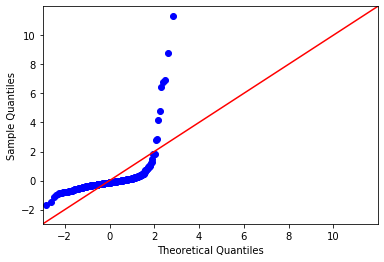

In [50]:
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)

<b>Notes:</b>

A Q-Q plot checks to ensure that our residuals are normally distributed. Theoretically, we would expect all "blue dots" which represents the residuals for our data, to be normally distributed, and would follow the red line in the plot perfectly. However, <b>our sample has a non-normal distribution of residuals</b> because it snakes around the red line, and then takes a sharp turn upwards towards higher sample quantile values of 10+, when theoretically, it should be around 2 or 3 at the same quantile.

___

### 8. Ensure homoscedasticity by checking for heteroscedasticity

#### Check for homoscedacity
Need to check that errors do not display heteroscedasticity; if the errors appear to increase or decrease based on the target variable, then the model does not meet the initial assumptions. Scatterplot of residual quantity on the x-axis against standard deviation on the y-axis.

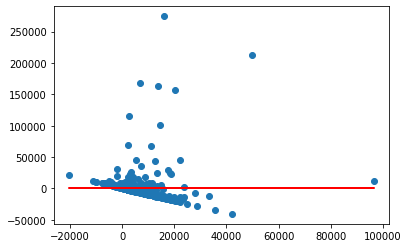

In [53]:
plt.scatter(predictions, results.resid)
plt.plot(predictions, [0 for i in range(len(x_train))], color = 'r')
plt.show()

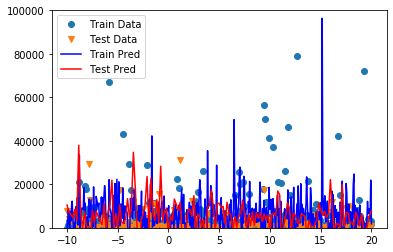

In [60]:
fig, ax = plt.subplots()
x_tr = np.linspace(-10, 20, len(x_train))
x_te = np.linspace(-10, 20, len(x_test))
ax.plot(x_tr, y_train, 'o', label="Train Data")
ax.plot(x_te, y_test, 'v', label="Test Data")
ax.plot(x_tr, predictions, 'b-', label="Train Pred")
ax.plot(x_te, predictions_test, 'r-', label="Test Pred")
plt.ylim(0, 100000)
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

# Vegan Regressions

In [63]:
predictors = vegan[x_variables_1]
target = vegan['aggregateLikes']
x_train, x_test, y_train, y_test = train_test_split(predictors, target, random_state = 2020, test_size = .25) 

X = x_train 
y = y_train 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     3.414
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           3.68e-09
Time:                        16:31:23   Log-Likelihood:                -4059.1
No. Observations:                 357   AIC:                             8190.
Df Residuals:                     321   BIC:                             8330.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4.179e+05   6.71e+05      0.623      0.534   -9.02e+05    1.74e+06
num_ingredients           -265.7972   1601.171     -0.166      0.868   -3415.912    2884.318
pricePerServing           -655.6758   3335.399     -0.197      0.844   -7217.679    5906.328
readyInMinutes            2805.2863   1519.437      1.846      0.066    -184.027    5794.600
servings                 -2878.5064   1967.450     -1.463      0.144   -6749.232     992.219
weightWatcherSmartPoints  5095.5230   7243.279      0.703      0.482   -9154.772    1.93e+04
Calories                  5.161e+04   3.78e+04      1.364      0.173   -2.28e+04    1.26e+05
Fat                      -3.465e+04   2.19e+04     -1.582      0.115   -7.77e+04    8441.581
Saturated_Fat              726.5974   3103.721      0.234      0.815   -5379.606    6832.800
Carbohydrates             -3.02e+04   1.86e+04     -1.621      0.106   -6.69e+04    6451.001
Sugar                     2408.3283   2397.621      1.004      0.316   -2308.708    7125.365
Cholesterol               9.936e+05   1.65e+06      0.602      0.548   -2.25e+06    4.24e+06
Sodium                    5960.9315   1373.862      4.339      0.000    3258.021    8663.842
Protein                  -2.404e+04   1.25e+04     -1.923      0.055   -4.86e+04     553.215
Vitamin_K                -1394.6631   1739.363     -0.802      0.423   -4816.655    2027.328
Vitamin_A                 -745.9180   1553.492     -0.480      0.631   -3802.231    2310.395
Vitamin_C                -1580.6149   1895.364     -0.834      0.405   -5309.519    2148.289
Manganese                 1940.1842   2416.356      0.803      0.423   -2813.711    6694.079
Folate                     943.1229   2360.940      0.399      0.690   -3701.746    5587.992
Fiber                    -3732.6749   3071.939     -1.215      0.225   -9776.352    2311.002
Copper                    1275.8626   1507.217      0.847      0.398   -1689.409    4241.135
Magnesium                -2222.6034   3273.546     -0.679      0.498   -8662.917    4217.710
Phosphorus                5554.0027   4774.436      1.163      0.246   -3839.135    1.49e+04
Vitamin_B6               -2530.6921   4075.749     -0.621      0.535   -1.05e+04    5487.862
Potassium                  546.9021   3271.918      0.167      0.867   -5890.210    6984.014
Vitamin_B1               -6165.4773   3830.930     -1.609      0.109   -1.37e+04    1371.424
Iron                     -3990.9936   5487.781     -0.727      0.468   -1.48e+04    6805.566
Vitamin_B2                1.629e+04   4515.948      3.607      0.000    7402.310    2.52e+04
Vitamin_E                -2886.7006   2240.447     -1.288      0.199   -7294.515    1521.114
Zinc                      3398.3735   5074.720      0.670      0.504   -6585.538    1.34e+04
Vitamin_B5    

In [64]:
x_variables_2 = ['readyInMinutes', 
              'servings', 
              'Calories', 
              'Fat', 
             'Carbohydrates', 
              'Sodium', 
              'Protein', 
              'Fiber', 
              'Phosphorus', 
              'Vitamin_B1', 
              'Vitamin_B2', 
              'Vitamin_E', 
              'Vitamin_B5', 
              'num_words_instructions']


predictors_2 = vegan[x_variables_2]
target = vegan['aggregateLikes']
x_train, x_test, y_train, y_test = train_test_split(predictors_2, target, random_state = 2020, test_size = .25) 

X = x_train 
y = y_train 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     6.875
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.92e-12
Time:                        16:38:29   Log-Likelihood:                -4071.3
No. Observations:                 357   AIC:                             8173.
Df Residuals:                     342   BIC:                             8231.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.394e+04   2372.343      5.878      0.000    9277.399    1.86e+04
readyInMinutes          2791.6383   1473.317      1.895      0.059    -106.266    5689.542
servings               -2635.5316   1645.023     -1.602      0.110   -5871.167     600.104
Calories                 8.35e+04   2.79e+04      2.988      0.003    2.85e+04    1.38e+05
Fat                    -4.985e+04   1.71e+04     -2.917      0.004   -8.35e+04   -1.62e+04
Carbohydrates          -4.271e+04   1.39e+04     -3.077      0.002      -7e+04   -1.54e+04
Sodium                  5193.6653   1133.711      4.581      0.000    2963.742    7423.589
Protein                -3.385e+04   1.02e+04     -3.332      0.001   -5.38e+04   -1.39e+04
Fiber                  -2802.2188   2080.190     -1.347      0.179   -6893.795    1289.358
Phosphorus              6469.4341   3804.650      1.700      0.090   -1014.025     1.4e+04
Vitamin_B1             -4847.6264   3054.486     -1.587      0.113   -1.09e+04    1160.317
Vitamin_B2              1.448e+04   3747.658      3.865      0.000    7111.969    2.19e+04
Vitamin_E              -3464.6096   1856.959     -1.866      0.063   -7117.109     187.890
Vitamin_B5              1.211e+04   3919.337      3.089      0.002    4397.581    1.98e+04
num_words_instructions  1432.1847   1374.250      1.042      0.298   -1270.861    4135.230
==============================================================================
Omnibus:                      374.795   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14016.538
Skew:                           4.619   Prob(JB):                         0.00
Kurtosis:                      32.274   Cond. No.                         67.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
x_variables_3 = [
             'Carbohydrates', 
              'Sodium', 
              'Vitamin_B2', 
              'Vitamin_B5']


predictors_3 = vegan[x_variables_3]
target = vegan['aggregateLikes']
x_train, x_test, y_train, y_test = train_test_split(predictors_3, target, random_state = 2020, test_size = .25) 

X = x_train 
y = y_train 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     16.21
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           3.37e-12
Time:                        16:42:59   Log-Likelihood:                -4085.4
No. Observations:                 357   AIC:                             8181.
Df Residuals:                     352   BIC:                             8200.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.315e+04   1537.974      8.548      0.000    1.01e+04    1.62e+04
Carbohydrates -4257.3820   1424.631     -2.988      0.003   -7059.241   -1455.523
Sodium         4246.8400   1105.718      3.841      0.000    2072.196    6421.484
Vitamin_B2     1.023e+04   2859.477      3.576      0.000    4602.500    1.59e+04
Vitamin_B5     8013.3975   2858.124      2.804      0.005    2392.249    1.36e+04
==============================================================================
Omnibus:                      404.557   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19167.398
Skew:                           5.146   Prob(JB):                         0.00
Kurtosis:                      37.390   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X = vegan[x_train.columns]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_train.columns, vif))

[('Carbohydrates', 1.26520403106819),
 ('Sodium', 1.1844376807670296),
 ('Vitamin_B2', 1.6495210984961015),
 ('Vitamin_B5', 1.75128331892018)]

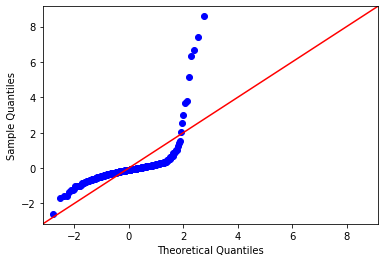

In [72]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

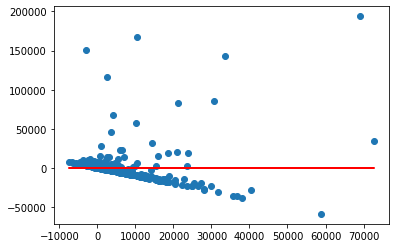

In [74]:
plt.scatter(predictions, model.resid)
plt.plot(predictions, [0 for i in range(len(x_train))], color = 'r')
plt.show()

In [76]:
lasso = Lasso(alpha = 0.05, max_iter=10000)
lasso.fit(x_train, y_train)
# sample_models['lasso'] = lasso
# y_lasso_test.append(lasso.score(X_test, y_test))
lasso_coefficients = dict(zip(x_variables_1, list(lasso.coef_)))
display('lasso coefficients')
display(lasso_coefficients)
display('lasso train score')
display(lasso.score(x_train, y_train))
display('lasso test score')
display(lasso.score(x_test, y_test))

'lasso coefficients'

{'num_ingredients': -4257.240790127536,
 'pricePerServing': 4246.812928331814,
 'readyInMinutes': 10226.145442896479,
 'servings': 8013.207672645637}

'lasso train score'

0.1555770133399469

'lasso test score'

-0.06334777792239277

In [81]:
ridge = Ridge(alpha = .05, max_iter= 10000)
ridge.fit(x_train, y_train)
ridge_coefficients = dict(zip(x_variables_1, list(ridge.coef_)))
display('ridge coefficients')
display(ridge_coefficients)
display('ridge train score')
display(ridge.score(x_train, y_train))
display('ridge test score')
display(ridge.score(x_test, y_test))

'ridge coefficients'

{'num_ingredients': -4254.878718578185,
 'pricePerServing': 4246.839714597419,
 'readyInMinutes': 10220.790974913001,
 'servings': 8010.23889521946}

'ridge train score'

0.15557699195373986

'ridge test score'

-0.06326786534391649

# Whole30 Regressions

In [82]:
predictors = whole30[x_variables_1]
target = whole30['aggregateLikes']
x_train, x_test, y_train, y_test = train_test_split(predictors, target, random_state = 2020, test_size = .25) 

X = x_train 
y = y_train 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.416
Date:                Tue, 21 Jan 2020   Prob (F-statistic):             0.0810
Time:                        16:48:28   Log-Likelihood:                -2255.9
No. Observations:                 179   AIC:                             4584.
Df Residuals:                     143   BIC:                             4699.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.428e+04   2.29e+04      0.623      0.534    -3.1e+04    5.96e+04
num_ingredients          -1.187e+04    1.1e+04     -1.076      0.284   -3.37e+04    9939.433
pricePerServing           2.227e+04    1.5e+04      1.482      0.141   -7437.828     5.2e+04
readyInMinutes            -515.3225   6900.106     -0.075      0.941   -1.42e+04    1.31e+04
servings                  1.542e+04   8361.520      1.844      0.067   -1105.949     3.2e+04
weightWatcherSmartPoints -1.347e+04   4.42e+04     -0.305      0.761   -1.01e+05    7.39e+04
Calories                  -6.13e+04   2.17e+05     -0.282      0.778   -4.91e+05    3.68e+05
Fat                       1.765e+04   1.34e+05      0.132      0.895   -2.46e+05    2.82e+05
Saturated_Fat             4.635e+04   6.05e+04      0.766      0.445   -7.32e+04    1.66e+05
Carbohydrates             5.096e+04   1.14e+05      0.448      0.655   -1.74e+05    2.76e+05
Sugar                    -2.104e+04   1.59e+04     -1.324      0.188   -5.24e+04    1.04e+04
Cholesterol              -7032.2019   1.93e+04     -0.364      0.716   -4.52e+04    3.12e+04
Sodium                    1.063e+04   1.32e+04      0.808      0.420   -1.54e+04    3.66e+04
Protein                   -4.49e+04   8.74e+04     -0.514      0.608   -2.18e+05    1.28e+05
Vitamin_K                -2650.6464   9172.988     -0.289      0.773   -2.08e+04    1.55e+04
Vitamin_A                 1134.6668   7688.589      0.148      0.883   -1.41e+04    1.63e+04
Vitamin_C                -1.555e+04   1.12e+04     -1.388      0.167   -3.77e+04    6591.231
Manganese                  501.4683   1.53e+04      0.033      0.974   -2.98e+04    3.08e+04
Folate                   -1.667e+04   1.62e+04     -1.027      0.306   -4.88e+04    1.54e+04
Fiber                    -1.368e+04   2.44e+04     -0.562      0.575   -6.18e+04    3.45e+04
Copper                   -3885.3410   7045.260     -0.551      0.582   -1.78e+04       1e+04
Magnesium                 1.728e+04   2.63e+04      0.656      0.513   -3.48e+04    6.94e+04
Phosphorus                3.708e+04   3.99e+04      0.928      0.355   -4.19e+04    1.16e+05
Vitamin_B6                1.644e+04   2.66e+04      0.618      0.538   -3.62e+04    6.91e+04
Potassium                 5739.3969   2.21e+04      0.259      0.796    -3.8e+04    4.95e+04
Vitamin_B1               -1.615e+04   2.17e+04     -0.746      0.457   -5.89e+04    2.66e+04
Iron                     -3.241e+04   3.37e+04     -0.961      0.338   -9.91e+04    3.42e+04
Vitamin_B2                4.121e+04   2.22e+04      1.859      0.065   -2603.738     8.5e+04
Vitamin_E                -1.458e+04   1.61e+04     -0.904      0.367   -4.64e+04    1.73e+04
Zinc                     -1.123e+04   1.56e+04     -0.721      0.472    -4.2e+04    1.96e+04
Vitamin_B5    

In [88]:
x_variables_2 = [
              'Vitamin_B2']


predictors_2 = whole30[x_variables_2]
target = whole30['aggregateLikes']
x_train, x_test, y_train, y_test = train_test_split(predictors_2, target, random_state = 2020, test_size = .25) 

X = x_train 
y = y_train 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           9.42e-05
Time:                        16:53:20   Log-Likelihood:                -2274.8
No. Observations:                 179   AIC:                             4554.
Df Residuals:                     177   BIC:                             4560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.177e+04   6098.438      3.570      0.000    9738.289    3.38e+04
Vitamin_B2  2.898e+04   7252.488      3.996      0.000    1.47e+04    4.33e+04
==============================================================================
Omnibus:                      238.975   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12198.991
Skew:                           5.670   Prob(JB):                         0.00
Kurtosis:                      41.820   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

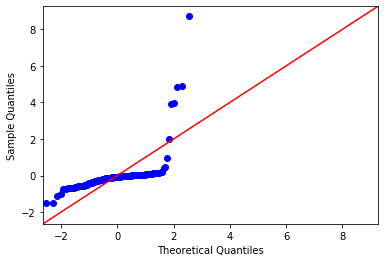

In [92]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

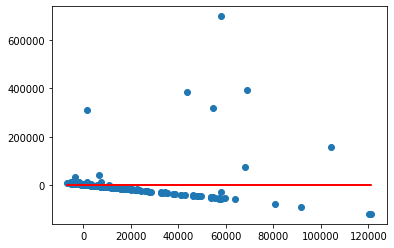

In [93]:
plt.scatter(predictions, model.resid)
plt.plot(predictions, [0 for i in range(len(x_train))], color = 'r')
plt.show()

In [91]:
lasso = Lasso(alpha = 0.05, max_iter=10000)
lasso.fit(x_train, y_train)
# sample_models['lasso'] = lasso
# y_lasso_test.append(lasso.score(X_test, y_test))
lasso_coefficients = dict(zip(x_variables_1, list(lasso.coef_)))
display('lasso coefficients')
display(lasso_coefficients)
display('lasso train score')
display(lasso.score(x_train, y_train))
display('lasso test score')
display(lasso.score(x_test, y_test))

'lasso coefficients'

{'Vitamin_B2': 28984.311231700012}

'lasso train score'

0.08276757336077734

'lasso test score'

-1.3484487140563672

In [90]:
ridge = Ridge(alpha = .05, max_iter= 10000)
ridge.fit(x_train, y_train)
ridge_coefficients = dict(zip(x_variables_1, list(ridge.coef_)))
display('ridge coefficients')
display(ridge_coefficients)
display('ridge train score')
display(ridge.score(x_train, y_train))
display('ridge test score')
display(ridge.score(x_test, y_test))

'ridge coefficients'

{'Vitamin_B2': 28972.606520403548}

'ridge train score'

0.08276755969545402

'ridge test score'

-1.3473931963542949